# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [27]:
# import necessary packages
import pandas as pd
import numpy as np

In [28]:
# load .csv file with data
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [29]:
# show how the data looks
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


# Data validation

In [30]:
# check the data types in columns are correct with the instructions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [31]:
# check where are null values
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [32]:
# drop the rows with null data
df = df.dropna(subset = ['calories', 'carbohydrate', 'sugar', 'sugar'])

The rows with missing values were decided to be removed, so they will not disturb calculations.

### 'servings' column

In [33]:
# check 'servings' column is correct
df['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [34]:
# remove ' as as snack' from the values
df['servings'] = df['servings'].str.replace(' as a snack','').astype(int)

We can find that some recipes' servings are specified that they are snacks. It is not desired, so this adnotations were removed.

### 'category' column

In [35]:
# check 'servings' column is correct
df['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [36]:
# replace 'Chicken Breast' with simply 'Chicken'
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

Chicken Breast category was simplified to Chicken category, which is presented in the instruction and Chicken Breast is not.

### 'high_traffic' column

In [37]:
# check 'high_traffic' column is correct
df['high_traffic'].value_counts()

High    535
Name: high_traffic, dtype: int64

In [38]:
# replace null values with 'Low'
df['high_traffic'] = df['high_traffic'].fillna('Low')

Replacing missing values with Low category would be better for future calculations.

# Exploratory Analysis
### to answer the customer questions ensuring you include

In [39]:
# import necessary packages for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

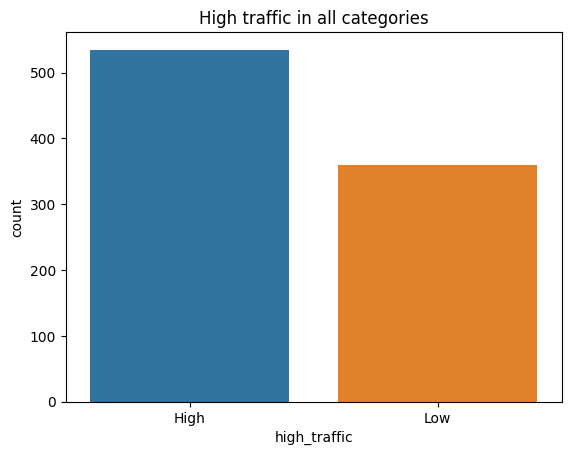

In [40]:
# create a countplot of all high_traffic categories
sns.countplot(
    data = df,
    x = 'high_traffic'
)
plt.title('High traffic in all categories')
plt.show()

We can find that the recipes with High popularity outnumbers the ones with Low popularity.

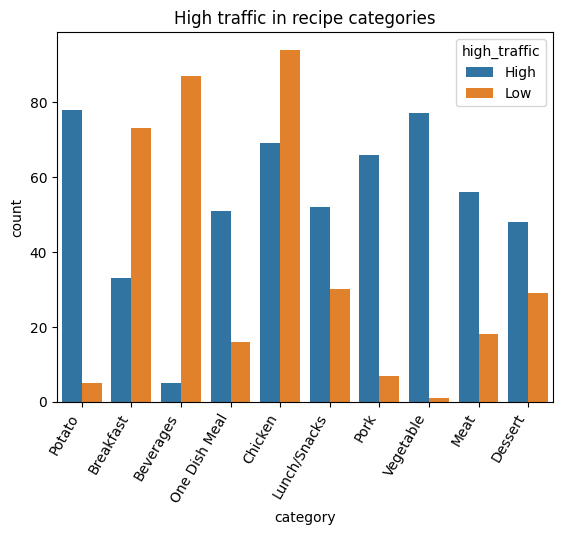

In [41]:
# create a countplot of number of high_traffic categories in different recipe categories
ax = sns.countplot(
    data = df,
    x = 'category',
    hue = 'high_traffic'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('High traffic in recipe categories')
plt.show()

The popularity varies in different categories. For example Potato recipes are really popular, also Vegetable and Pork. On the other hand Beverages are not popular at all.

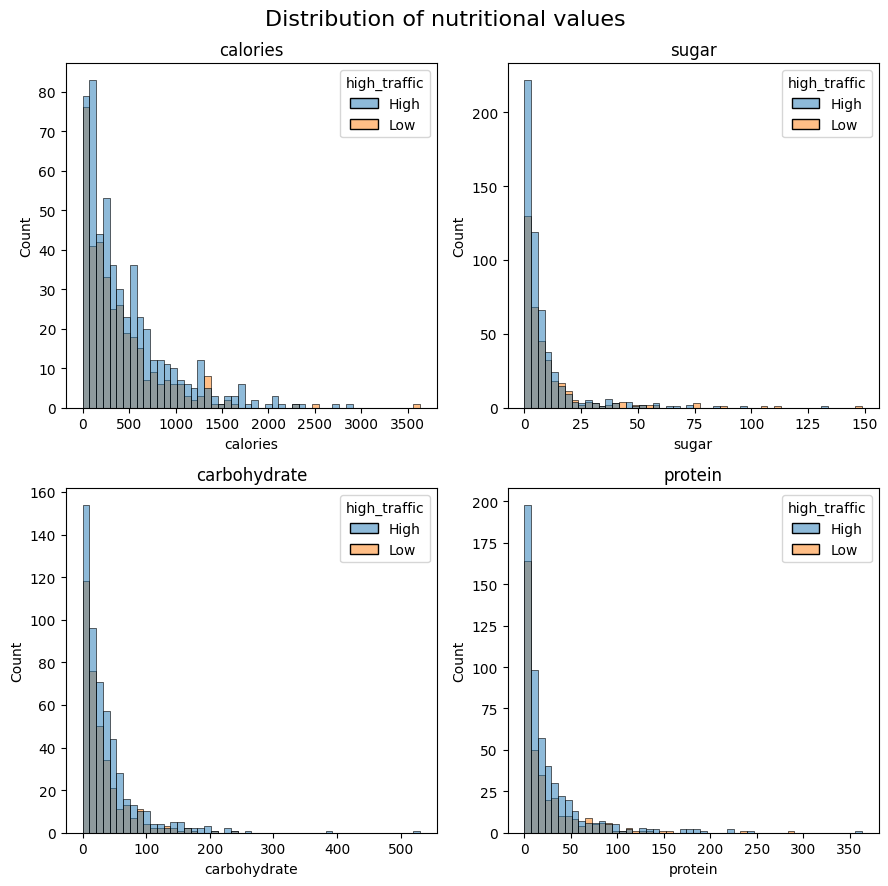

In [42]:
# create histograms for each numeric categories (calories, carbohydrate, sugar and protein) high_traffic division

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9,9))
fig.suptitle('Distribution of nutritional values', fontsize = 16)

sns.histplot(
    data=df,
    x = 'calories', 
    bins=50, 
    ax=axes[0, 0],
    hue = 'high_traffic')
axes[0, 0].set_title('calories')

sns.histplot(
    data=df,
    x = 'carbohydrate', 
    bins=50, 
    ax=axes[1, 0],
    hue = 'high_traffic')
axes[1, 0].set_title('carbohydrate')

sns.histplot(
    data=df,
    x = 'sugar', 
    bins=50, 
    ax=axes[0, 1],
    hue = 'high_traffic')
axes[0, 1].set_title('sugar')

sns.histplot(
    data=df,
    x = 'protein', 
    bins=50, 
    ax=axes[1, 1],
    hue = 'high_traffic')
axes[1, 1].set_title('protein')

plt.tight_layout()
plt.show()

All of the histograms for every nutritional values are right skewed and also almost in every bin recipes with high traffic outnumber these ones with lower traffic.

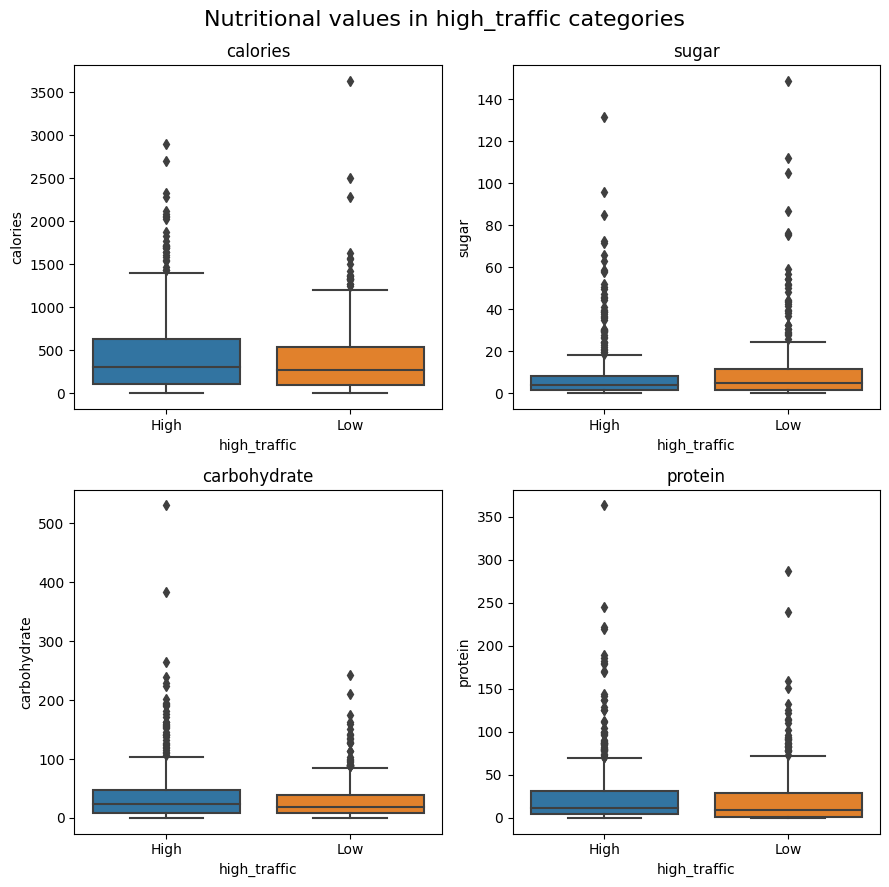

In [43]:
# by analogy create 4 boxplots

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9,9))
fig.suptitle('Nutritional values in high_traffic categories', fontsize = 16)

sns.boxplot(
    data=df,
    y = 'calories', 
    ax=axes[0, 0],
    x = 'high_traffic')
axes[0, 0].set_title('calories')

sns.boxplot(
    data=df,
    y = 'carbohydrate', 
    ax=axes[1, 0],
    x = 'high_traffic')
axes[1, 0].set_title('carbohydrate')

sns.boxplot(
    data=df,
    y = 'sugar', 
    ax=axes[0, 1],
    x = 'high_traffic')
axes[0, 1].set_title('sugar')

sns.boxplot(
    data=df,
    y = 'protein', 
    ax=axes[1, 1],
    x = 'high_traffic')
axes[1, 1].set_title('protein')

plt.tight_layout()
plt.show()

We can find that the boxplots for every nutritional value are similar. Due to right skeweness there are not lower outliers, but a lot of higher outliers. Only for sugar recipes with lower traffic have higher values.

In [44]:
# create a new df with means for every nutritional values for every category for the next visualization
df_means = pd.melt(df[['calories', 'carbohydrate', 'sugar', 'protein', 'category']], 'category').groupby(['category', 'variable']).mean().reset_index()
df_means

,category,variable,value
0,Beverages,calories,177.732174
1,Beverages,carbohydrate,15.955978
2,Beverages,protein,0.594783
3,Beverages,sugar,12.537283
4,Breakfast,calories,331.880000
5,Breakfast,carbohydrate,39.711698
6,Breakfast,protein,16.957170
7,Breakfast,sugar,7.552264
8,Chicken,calories,551.511227
9,Chicken,carbohydrate,25.608344


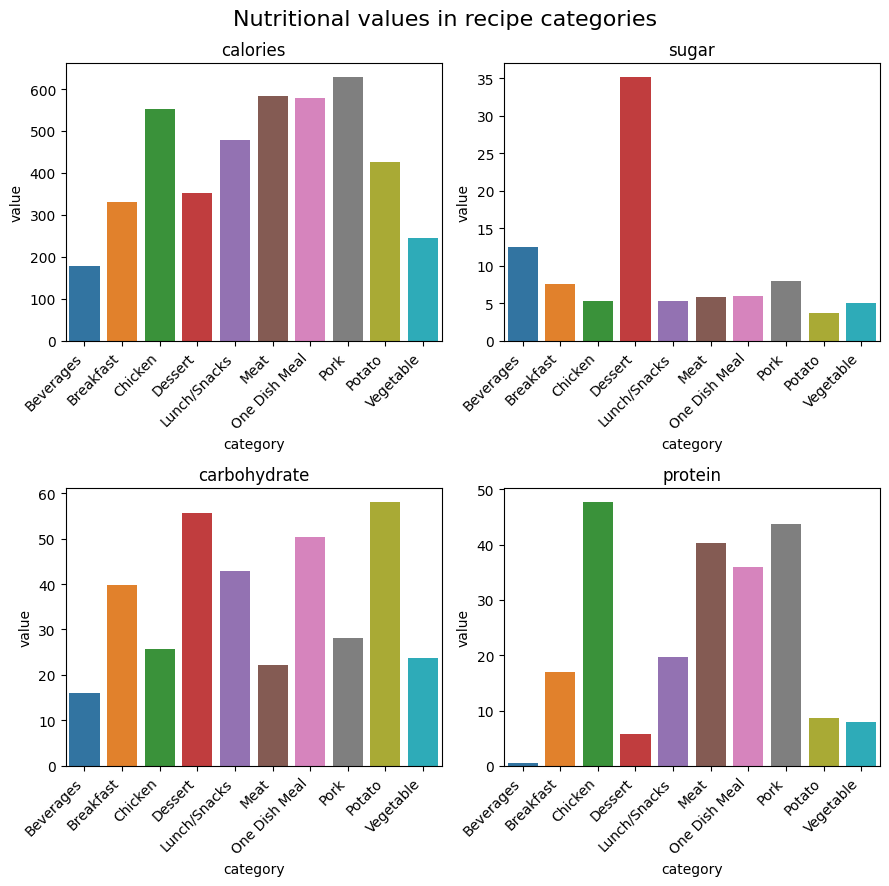

In [45]:
# using newly created df creat 4 barplots

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9,9))

sns.barplot(
    data=df_means[df_means['variable']=='calories'],
    y = 'value', 
    ax=axes[0, 0],
    x = 'category')
axes[0, 0].set_title('calories')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(
    data=df_means[df_means['variable']=='carbohydrate'],
    y = 'value', 
    ax=axes[1, 0],
    x = 'category')
axes[1, 0].set_title('carbohydrate')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(
    data=df_means[df_means['variable']=='sugar'],
    y = 'value', 
    ax=axes[0, 1],
    x = 'category')
axes[0, 1].set_title('sugar')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(
    data=df_means[df_means['variable']=='protein'],
    y = 'value', 
    ax=axes[1, 1],
    x = 'category')
axes[1, 1].set_title('protein')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right")

fig.suptitle('Nutritional values in recipe categories', fontsize = 16)
plt.tight_layout()
plt.show()

The amount of nutritional values vary deeply in different categories. Firstly it is clearly visible that sugar is much more present than in any other category, which is clearly obvious. Also proteins are completely not found in Beverages, but widely present in different meat-related categories (Chicken, Meat, Pork).

# Model Development

As our goal is to correctly specify every recipe to Low or High high_traffic category, we are solving a:

**classification problem**

In [46]:
# import all the necessary modules from sklearn library

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
# create X and y variables
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']]
y = df['high_traffic']

In [48]:
# turn 'category' into one-hot variables
X_dummies = pd.get_dummies(X, drop_first= True)

In [49]:
# show whole table with one-hot variables
X_dummies

,calories,carbohydrate,sugar,protein,servings,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
1,35.48,38.56,0.66,0.92,4,0,0,0,0,0,0,0,1,0
2,914.28,42.68,3.09,2.88,1,1,0,0,0,0,0,0,0,0
3,97.03,30.56,38.63,0.02,4,0,0,0,0,0,0,0,0,0
4,27.05,1.85,0.80,0.53,4,0,0,0,0,0,0,0,0,0
5,691.15,3.46,1.65,53.93,2,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,186.21,83.94,1.98,22.40,4,0,1,0,0,0,0,0,0,0
942,1161.00,5.31,22.39,44.22,2,0,0,0,1,0,0,0,0,0
944,951.74,29.42,3.57,13.87,2,0,0,0,0,0,0,1,0,0
945,266.61,35.77,0.97,8.07,6,0,0,0,0,0,0,0,1,0


In [50]:
# split X and y into training groups and scale them
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting the models

We're going to fit the following models:
- Logistic Regression
- Gaussian Naive Bayes
- K-Neighbors Classiffier
- Decision Tree Classifier
- Gradient Boosting Classifier
and find the best one basing on the classification results

In [51]:
# defying the models going to be used with all the parameters to find the best one

models = [
    (LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }),
    (GaussianNB(), {
        'var_smoothing': np.logspace(0, -9, num=10)
    }),
    (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
    (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    })
]

In [52]:
# iterate over models and perform hyperparameter tuning
for model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    
    y_pred = best_estimator.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name = model.__class__.__name__
    print(f"{model_name} - Best Parameters: {best_params}")
    print(f"{model_name} - Test Accuracy: {accuracy}\n")
    print(classification_report(y_test, y_pred))

LogisticRegression - Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression - Test Accuracy: 0.776536312849162

              precision    recall  f1-score   support

        High       0.80      0.83      0.81       106
         Low       0.74      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

GaussianNB - Best Parameters: {'var_smoothing': 0.1}
GaussianNB - Test Accuracy: 0.7318435754189944

              precision    recall  f1-score   support

        High       0.86      0.65      0.74       106
         Low       0.63      0.85      0.72        73

    accuracy                           0.73       179
   macro avg       0.74      0.75      0.73       179
weighted avg       0.77      0.73      0.73       179

KNeighborsClassifier - Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier

### Model evaluation
From the classification results we can find that the first one, Linear Regression, is the best one having the highest test accuracy.

But because the business goal is to predict which recipes will be popular 80% of the time, we should more focus only on results for High category. So it seems that not Linear Regression model, but GaussianNB seems to be the best with its higher precision rate for High category. It is 0.80 for Linear Regression and 0.86 for Gaussian NB, so the difference is challenging. But this difference is due to more careful approach in Gaussian NB which is visible in its lower accuracy and lower precision for Low category, it is because more popular recipes lands to Low category.

# Metrics to monitor
With defined business goals having high **precision rate for High category** is the most important, and it should be defined together with **accuracy rate (f1-score)** as the main metric.

# Recommendations
To sum up I would recommend Logistic Regression model to predict which recipes would be more popular on the website, but I would also recommend GaussianNB model as a more careful variant with lower accuracy, but with higher precision for High category.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation